#*Random Forest*

0. Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

1. Data Loading

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/train_r.csv")
df_test = pd.read_csv('/content/drive/MyDrive/test_r.csv')

<ipython-input-3-c54ebbe5ff48>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("/content/drive/MyDrive/train_r.csv")


In [4]:
df_s1 = pd.read_csv("/content/drive/MyDrive/submission_r.csv")
df_s2 = pd.read_csv('/content/drive/MyDrive/store_r.csv')

 1-1. 데이터 확인

In [5]:
df_train # train Data의 내용 확인 - ['Date'] column 제거

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
df_test # test Data의 내용확인

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
df_s1 # submission Data의 내용확인

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [8]:
df_s2 # store data내용 확인

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- ['Store'] Column : 매장 번호
- ['StoreType'] Column : 매장유형
- ['Assortment'] Column : 상품 구성
- ['CompettitionDistance'] Column : 경쟁 매장과의 거리
- ['CompetitionOpenSinceMonth'] Column : 경쟁매장 오픈한 월
- ['CompetitionOpenSInceYear'] Column : 경쟁매장 오픈한 년도
- ['Promo2'] Column : 프로모션 2 여부
- ['Promo2SinceWeek'] Column : 프로모션 2 시작 주
- ['Promo2SinceYear'] Column : 프로모션 2 시작년도
- ['Promo'] Column : 프로모션 간격

1-2. 불필요 컬럼 제거

In [9]:
df_train = df_train.drop(['Date'], axis=1)
df_test = df_test.drop(['Date'], axis=1)

In [10]:
df_test = df_test.drop(['Id'], axis=1)

1-3. Randomforest Classifier의 Feature Importance 추출

In [11]:
df_train['StateHoliday'] = df_train['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환

In [12]:
# 'Sales' 컬럼을 Y-Label로 설정
y = df_train['Sales']
X = df_train.drop('Sales', axis=1)

In [13]:
# Random Forest 모델 훈련
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)

RandomForestRegressor()

In [14]:
# 특성 중요도 추출 및 시각화
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

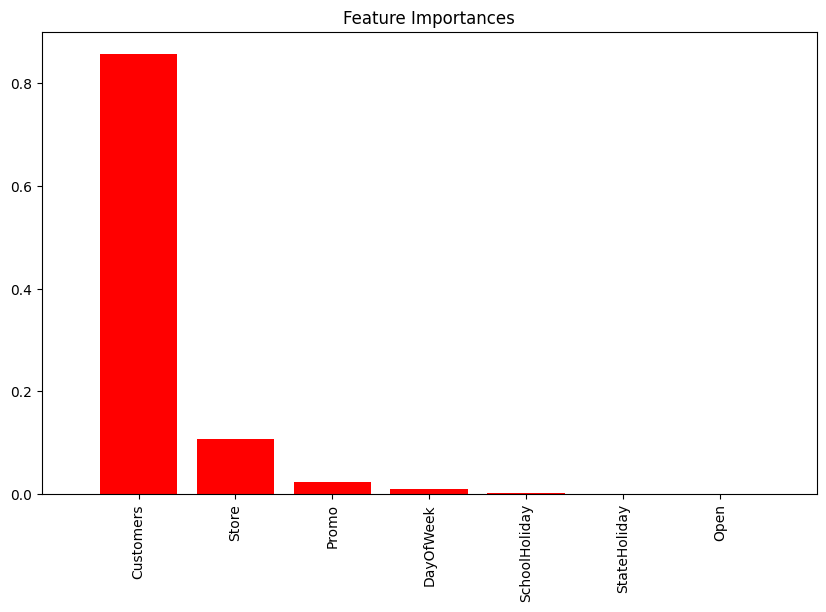

In [15]:
# 시각화 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

2. Randomforest Model 훈련

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 훈련 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_r.csv')

train_data['StateHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환

<ipython-input-29-0f2db29962db>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')


In [32]:
train_data = train_data.drop(['Date'], axis=1)
test_data = test_data.drop(['Date'], axis=1)

test_data = test_data.drop(['Id'], axis=1)


In [33]:
# 훈련 데이터에서 'Sales' 컬럼을 y로, 나머지 컬럼들을 X로 설정
X_train = train_data.drop(['Sales','Customers'], axis=1)
y_train = train_data['Sales']

# 랜덤 포레스트 모델을 초기화
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
X_test = test_data.copy()

In [36]:
train_data['StateHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환
test_data['StateHoliday'] = test_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환

In [41]:
train_data

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,5263,555,1,1,0,1
1,2,5,6064,625,1,1,0,1
2,3,5,8314,821,1,1,0,1
3,4,5,13995,1498,1,1,0,1
4,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1
1017205,1112,2,0,0,0,0,1,1
1017206,1113,2,0,0,0,0,1,1
1017207,1114,2,0,0,0,0,1,1


In [40]:
test_data

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,1.0,1,0,0
1,3,4,1.0,1,0,0
2,7,4,1.0,1,0,0
3,8,4,1.0,1,0,0
4,9,4,1.0,1,0,0
...,...,...,...,...,...,...
41083,1111,6,1.0,0,0,0
41084,1112,6,1.0,0,0,0
41085,1113,6,1.0,0,0,0
41086,1114,6,1.0,0,0,0


In [42]:
# test_data의 'Open' 컬럼에서 NaN을 0으로 대체
test_data['Open'].fillna(0, inplace=True)

In [44]:
X_test = test_data.copy()

In [45]:
predictions = model.predict(X_test)

3. 시각화

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# 모델의 교차 검증을 통해 성능 추정
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

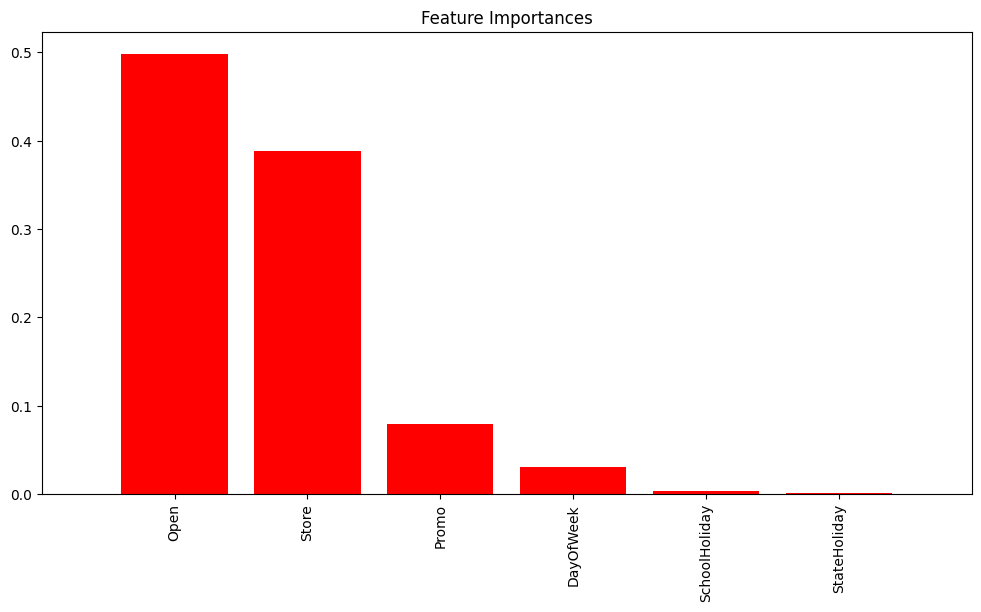

In [47]:
# 특성 중요도 시각화
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

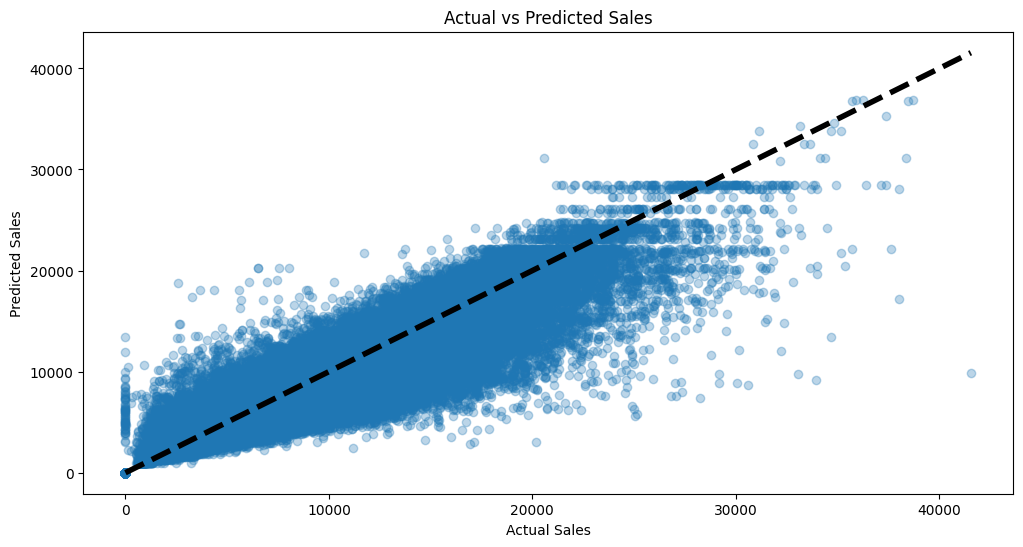

In [48]:
# 실제 값과 예측 값의 관계를 플롯
predictions = model.predict(X_train)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, predictions, alpha=0.3)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.show()

# 그래프 해석

 - 점선에 가까운 점들:
 많은 데이터 포인트들이 점선 근처에 몰려 있어, 모델이 많은 경우에 상당히 정확한 예측을 제공한
 - 점선에서 멀리 떨어진 점들: 일부 예측이 실제 값과 상당히 다름. 특히 높은 'Sales' 값을 가진 데이터 포인트에서 더 큰 차이를 보임
 - 예측 범위: 예측된 'Sales' 값이 일정한 범위 내에 존재, 특히 실제 'Sales' 값이 높은 경우에 예측값이 실제값을 따라가지 못하는 경향을 보임
  이는 모델이 높은 매출을 가진 데이터 포인트에 대해 과소평가하는 경향이 있음을 의미
 - 1. 이 그래프를 기반으로 모델이 전반적으로 적절한 예측을 하고 있지만, 특히 높은 'Sales' 값을 가진 데이터 포인트에서 성능이 저하될 가능성이 있음을 알 수 있음.
 - 2. 모델 성능을 더 향상시키기 위해 추가적인 특성 공학, 모델 파라미터 조정, 또는 다른 모델을 사용하는 방법을 고려할 수 있습니다.

In [49]:
# 교차 검증 점수 출력
print(f"Mean Absolute Error of the model in cross-validation: {-np.mean(cv_scores)}")

Mean Absolute Error of the model in cross-validation: 699.7291705150652


4. 평가지표

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 훈련 데이터 불러오기
train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')
train_data = train_data.drop(['Date'], axis=1)
train_data['StateHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환

# 훈련 데이터를 훈련 세트와 검증 세트로 분할
X1 = train_data.drop(['Sales','Customers'], axis=1)
y1 = train_data['Sales']
X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 모델 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 검증 세트에서의 성능 평가
predictions_valid = model.predict(X_valid)
mae = mean_absolute_error(y_valid, predictions_valid)
mse = mean_squared_error(y_valid, predictions_valid)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, predictions_valid)

# 평가 지표 출력
print(f"Validation MAE: {mae}")
print(f"Validation MSE: {mse}")
print(f"Validation RMSE: {rmse}")
print(f"Validation R-squared: {r2}")


<ipython-input-52-9d8e3fc495c2>:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')


Validation MAE: 678.3402837677864
Validation MSE: 1279744.055124935
Validation RMSE: 1131.2577315205122
Validation R-squared: 0.9134652989838765


In [61]:
# 'Sales' 데이터의 기술 통계 , Sales' 컬럼의 최댓값, 최솟값, 평균값, 중앙값, 표준편차 등을 출력
print(train_data['Sales'].describe())

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64


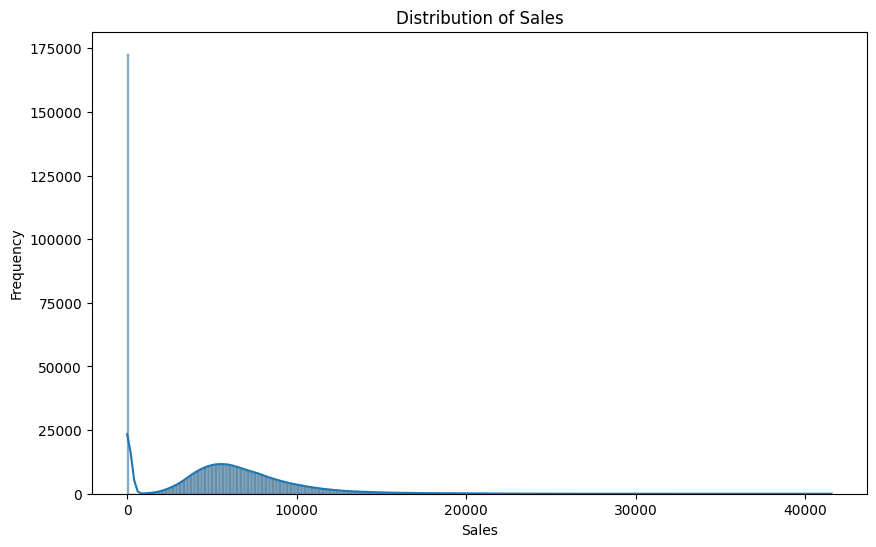

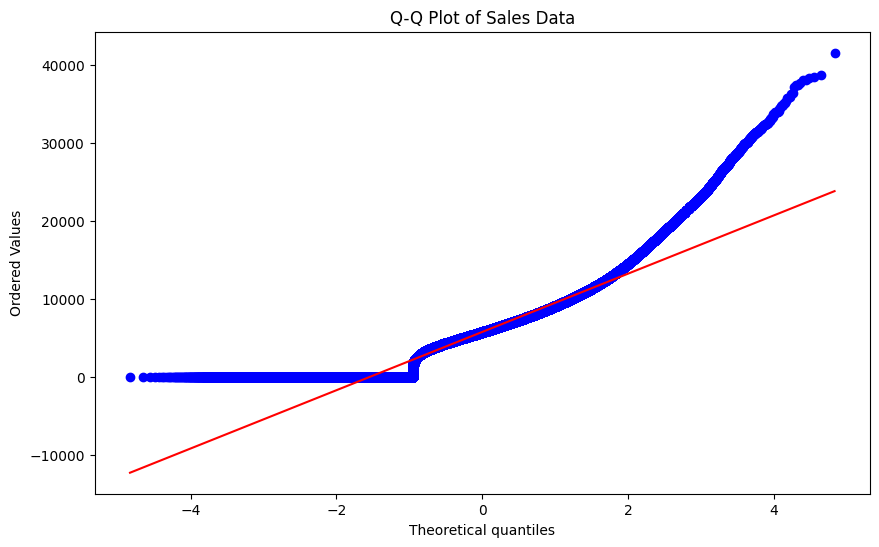

In [62]:
# 정규분포표 확인

import seaborn as sns
import matplotlib.pyplot as plt

# 'Sales' 데이터의 분포를 시각화
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot으로 정규분포 확인
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(train_data['Sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales Data')
plt.show()


# RandomForest Model의 최종평가
## 1. 'Sales' 데이터 기술 통계:

- 평균 (mean): 약 5773.82
- 표준편차 (std): 약 3849.93
- 최솟값 (min): 0
- 최댓값 (max): 41551
- 중간값 (50% or median): 5744

## 2. 모델 성능 지표:

#### - Validation MAE (Mean Absolute Error): 678.34
- 모델의 예측이 평균적으로 실제 값과 약 678 단위만큼 차이가 남.'Sales'의 평균이 약 5774이므로, MAE는 평균 'Sales'의 약 11.7%에 해당.
이는 'Sales' 값의 범위를 고려했을 때, 비교적 낮은 오차로 볼 수 있음.

##### - Validation MSE (Mean Squared Error): 1,279,744.06
- 예측 오차의 제곱에 대한 평균. 이 값은 큰 오차에 대해 더 많은 가중치를 부여. 오차가 크면 MSE도 상대적으로 크게 증가.

##### - Validation RMSE (Root Mean Squared Error): 1131.26
- RMSE는 MSE의 제곱근으로, 'Sales'의 단위와 동일한 단위로 오차를 나타냄.
RMSE가 'Sales'의 평균 대비 약 19.6%임을 고려하면, 모델은 적절한 수준의 예측 정확도를 갖고 있다고 볼 수 있음.

##### - Validation R-squared: 0.9135

- R² 값은 모델이 데이터 변동성의 약 91.35%를 설명한다는 것을 나타냄. 1에 가까운 R² 값은 모델이 데이터를 잘 설명하고 있음을 의미하며, 일반적으로 이 모델의 예측력은 매우 높다고 할 수 있음.

#### - 종합적으로, *모델의 MAE와 RMSE는 'Sales' 값의 범위와 표준편차를 감안할 때 비교적 낮은 오차를 나타내고 있으며, R² 값은 매우 높은 예측력을 나타냄*.
#### - 이는 모델이 데이터의 패턴을 잘 학습했으며, 검증 세트에 대해 높은 정확도로 'Sales'를 예측할 수 있다는 것을 의미

3. 매출예측 파일 저장하기 및 분석

In [54]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test_r.csv')

# 결측치 처리 및 전처리
test_data['Open'].fillna(0, inplace=True)

train_data['StateHoliday'] = train_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3}) # a,b,c 를 1,2,3 으로 전환
# 'StateHoliday' 컬럼 변환 - 이미 train_data에 적용된 것과 동일한 변환을 적용해야 합니다.
test_data['StateHoliday'] = test_data['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
train_data = train_data.drop(['Date'], axis=1) # Data Column 제거(Train Data)
test_data = test_data.drop(['Date'], axis=1)# Data Column 제거(Test Data)

test_data = test_data.drop(['Id'], axis=1) # Id Column 제거

# 훈련 데이터에서 'Sales' 컬럼을 y로, 나머지 컬럼들을 X로 설정
X_train = train_data.drop(['Sales','Customers'], axis=1)
y_train = train_data['Sales']


# 테스트 데이터에서 예측하기 위해 필요한 컬럼만 선택
# 'Customers' 컬럼은 제외 - 너무 높은 상관관계 다중공선성 문제 발생
X_test = test_data.drop(['Customers'], axis=1, errors='ignore')

# 모델을 사용하여 'Sales' 예측
predictions = model.predict(X_test)

# 예측된 'Sales' 값을 test_data에 추가
test_data['Sales'] = predictions

# 결과를 CSV 파일로 저장
test_data.to_csv('/content/drive/MyDrive/prediction.csv', index=False)


<ipython-input-54-8c2635f13ca5>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/train_r.csv')


In [55]:
prediction_data = pd.read_csv('/content/drive/MyDrive/prediction.csv')

In [56]:
prediction_data

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,4,1.0,1,0,0,4959.756624
1,3,4,1.0,1,0,0,7913.969063
2,7,4,1.0,1,0,0,8907.989928
3,8,4,1.0,1,0,0,7162.983940
4,9,4,1.0,1,0,0,6588.092724
...,...,...,...,...,...,...,...
41083,1111,6,1.0,0,0,0,3278.794446
41084,1112,6,1.0,0,0,0,8696.345486
41085,1113,6,1.0,0,0,0,5951.250590
41086,1114,6,1.0,0,0,0,22092.999618


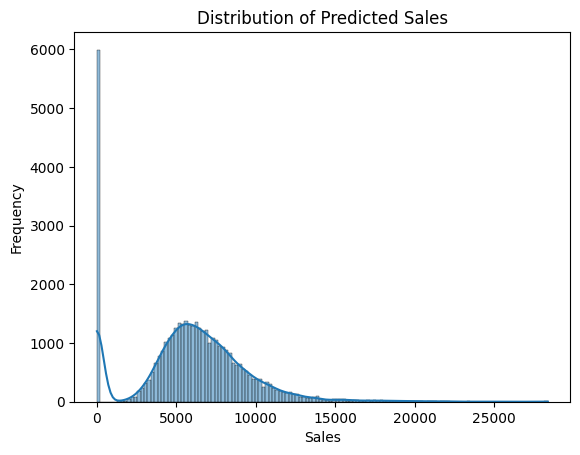

In [57]:
# 1. 데이터 분포도
import seaborn as sns
import matplotlib.pyplot as plt

# Sales 컬럼의 분포를 히스토그램으로 표시
sns.histplot(prediction_data['Sales'], kde=True)
plt.title('Distribution of Predicted Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


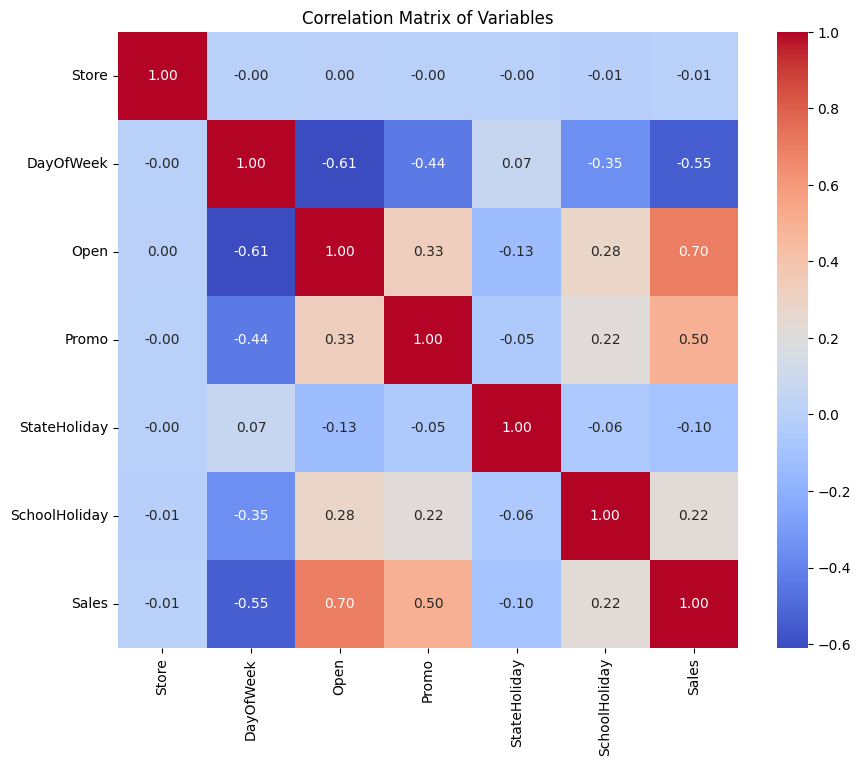

In [58]:
# 2. 상관관계도
# 모든 수치형 특성 간의 상관관계 행렬을 계산
correlation_matrix = prediction_data.corr()

# 상관관계 행렬의 히트맵을 표시
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


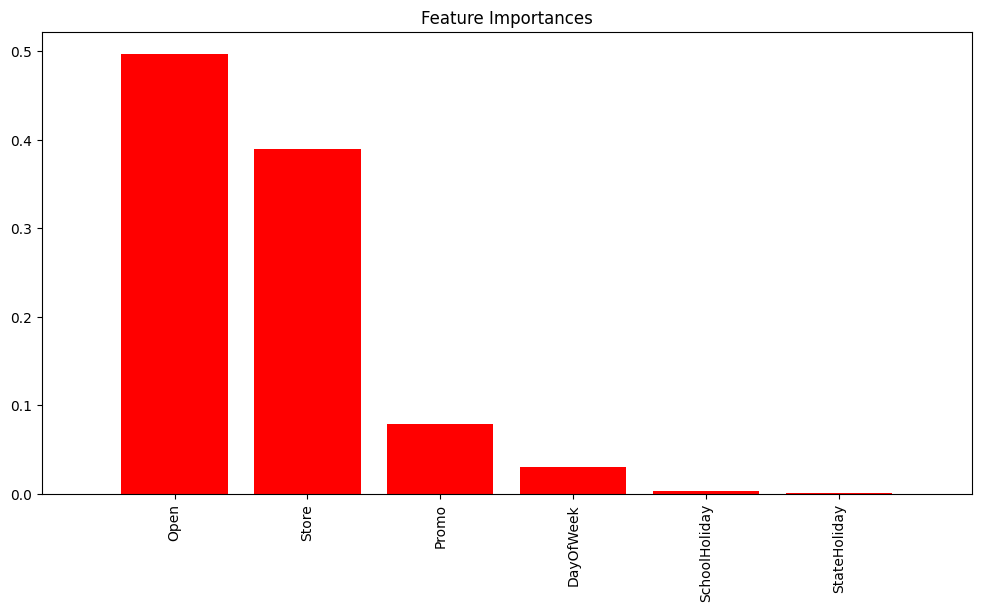

In [59]:
# 3. 특성중요도
# 특성 중요도를 시각화 (랜덤 포레스트 모델 기준)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


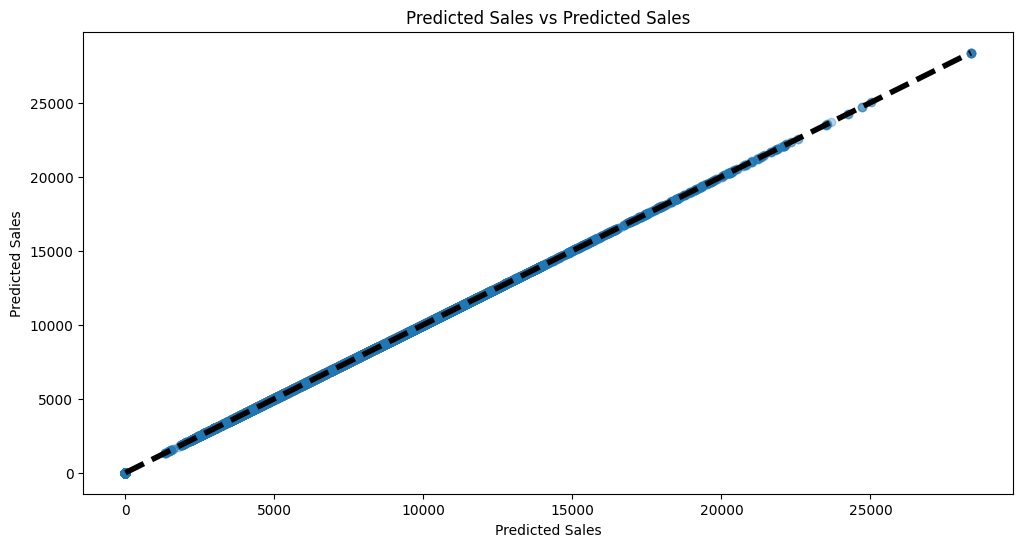

In [60]:
# 4. 산점분포도
# 실제 Sales 값과 예측된 Sales 값 사이의 관계를 산점도로 표시
plt.figure(figsize=(12, 6))
plt.scatter(prediction_data['Sales'], prediction_data['Sales'], alpha=0.3)
plt.title('Predicted Sales vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Predicted Sales')
plt.plot([prediction_data['Sales'].min(), prediction_data['Sales'].max()], [prediction_data['Sales'].min(), prediction_data['Sales'].max()], 'k--', lw=4)
plt.show()
